In [37]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.support.wait import WebDriverWait
# from bs4 import BeautifulSoup as bs4
# import time
# from tqdm import tqdm


# query = "dogs"
# URL = f'https://www.google.com/search?q={query}&tbm=isch'

# options = Options()
# options.binary_location = '/Applications/Brave Browser.app/Contents/MacOS/Brave Browser'
# ser = Service("path/chromedriver_mac_arm64/chromedriver")
# drvr = webdriver.Chrome(options = options, service=ser)
# drvr.maximize_window()
# drvr.get(URL)

# drvr.implicitly_wait(10)


# a = input("Waiting...")


# SCROLL_PAUSE_TIME = 2  # Adjust this pause time if needed
# SCROLL_COUNT = 5  # Adjust this count to control the number of scrolls

# # Scroll down the page multiple times to load more content
# for _ in range(SCROLL_COUNT):
#     drvr.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#     time.sleep(SCROLL_PAUSE_TIME)

# # Retrieve the updated page source after scrolling
# page_html = drvr.page_source
# pageSoup = bs4(page_html, 'html.parser')

# # Find the containers with the images
# containers = pageSoup.findAll('div', {'class': 'isv-r PNCib MSM1fd BUooTd'})

# print(len(containers))

# len_containers = len(containers)


# count = 0
# for i in tqdm(range(1, len_containers + 1)):
#     if i % 25 == 0:
#         continue
#     count += 1
    
#     if i < 50:
#         # This is current XPATH of the container
#         xPath = '//*[@id="islrg"]/div[1]/div[%d]' % (i)
#         # This is the XPATH of the preview image element
#         previewImageXPath = '//*[@id="islrg"]/div[1]/div[%d]/a[1]/div[1]/img' % (i)
#     elif i > 50 and i < 105: # NOTE: 51 - 104 --> div[51] part
#         print("i", i)                     
#         if i // 51 > 0:
#             xPath = '//*[@id="islrg"]/div[1]/div[51]/div[%d]' % ((i - 51) + 1)
#             print("xPath", xPath)
#             previewImageXPath = '//*[@id="islrg"]/div[1]/div[51]/div[%d]/a[1]/div[1]/img' % ((i - 51) + 1)
#     elif i > 104 and i < 209: # NOTE: 105 - 208 --> div[52] part
#         print("i", i)
#         if i // 52 > 0:
#             xPath = '//*[@id="islrg"]/div[1]/div[52]/div[%d]' % ((i - 104))
#             print("xPath", xPath)
#             previewImageXPath = '//*[@id="islrg"]/div[1]/div[52]/div[%d]/a[1]/div[1]/img' % ((i - 104))



#     previewImageElement = drvr.find_element(By.XPATH, previewImageXPath)
#     previewImageURL = previewImageElement.get_attribute("src")

#     drvr.find_element(By.XPATH, xPath).click()

#     #It's all about the wait

#     timeStarted = time.time()
#     while True:

#         # This is the XPATH of the full res image element (the one after clicking on the image that we want to download)
#         WebDriverWait(drvr, timeout=10)
#         imageElement = drvr.find_element(By.XPATH, '//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]')
        
#         imageURL= imageElement.get_attribute('src')

#         if imageURL != previewImageURL:
#             #print("actual URL", imageURL)
#             break

#         else:
#             #making a timeout if the full res image can't be loaded
#             currentTime = time.time()

#             if currentTime - timeStarted > 10:
#                 print("Timeout! Will download a lower resolution image and move onto the next one")
#                 break

#     #Downloading image
#     try:
#         # download_image(imageURL, folder_name, i)
#         print("Downloaded element %d out of %d total. URL: %s" % (i, len_containers + 1, imageURL))
#     except:
#         print("Couldn't download an image %d, continuing downloading the next one" % (i))


# print("After passing related searches total number of images are: %d" % (count))

# drvr.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


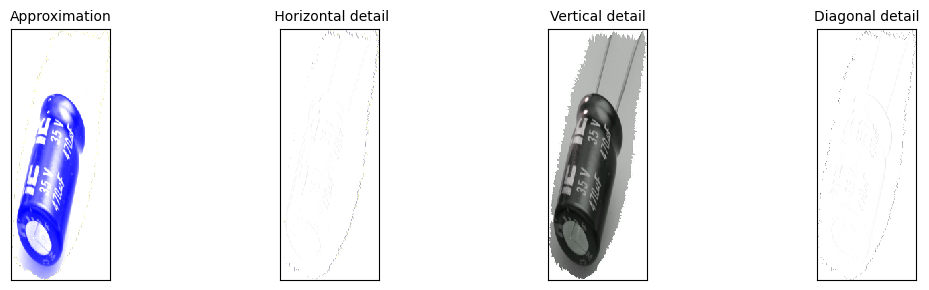

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()
print(type(original))

image = plt.imread("Image path")


# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(image, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [26]:
import cv2

def w2d(img, mode='haar', level=1):
    imgArray = img
    imgArray = cv2.cvtColor(imgArray, cv2.COLOR_RGB2GRAY)
    img = imgArray.astype('float64')
    img /= 255
    
    coeffs = pywt.wavedec2(img, mode, level=level)
    coeffs_H = list(coeffs)
    # coeffs_H[0] *= 0

    imgArray_H = pywt.waverec2(coeffs_H, mode)
    imgArray_H *= 255
    imgArray_H = np.uint(imgArray_H)

    return imgArray_H

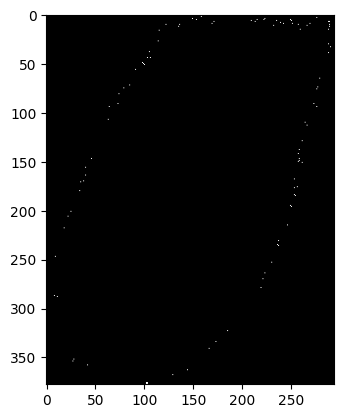

In [35]:
imgHar = w2d(image, 'bior2.6', 3)
plt.imshow(imgHar, cmap='gray')

In [21]:
import sys
from keras.src.saving.saving_api import load_model

sys.modules['utils'] = load_model

In [ ]:
import json
import pickle

class_name_to_number = {}
class_number_to_name = {}
model = None

def load_saved_artifacts(model_path, class_dictionary_path):

    global class_number_to_name
    global class_name_to_number

    print("loading saved artifacts...start")

    with open(model_path, "r") as f:
        class_name_to_number = json.load(f)
        class_number_to_name = {v:k for k, v in class_name_to_number.items()}

    global model

    if model is None:
        with open(class_dictionary_path, 'rb') as f:
            model = pickle.load(f)
    print("loading saved artifacts...done")


load_saved_artifacts("/Users/User/Desktop/Python projects/image classification/models/model_classes.json", \
                     "/Users/User/Desktop/Python projects/image classification/models/model.pkl")

In [26]:
from tensorflow import keras
import time

def load_model(model_path):
    print("loading model...start")

    time.sleep(3)
    model = keras.models.load_model(model_path)

    print("loading model...done")

    return model

load_model("/Users/User/Desktop/Python projects/image classification/models/my_model")

loading model...start


loading model...done


In [2]:
import json

with open("/Users/User/Desktop/Python projects/image classification/models/model_classes.json", "r") as f:
    print(json.load(f))

{'capacitor': 0, 'diode': 1, 'integrated circuit': 2, 'resistor': 3, 'transistor': 4}
